In [2]:
from lda2vec import preprocess, Corpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

/usr/local/lib/python3.6/site-packages/chainer/_environment_check.py:38: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Also note that Chainer does not officially support Mac OS X.
Please use it at your own risk.

  ''')  # NOQA


You must be using a very recent version of pyLDAvis to use the lda2vec outputs. 
As of this writing, anything past Jan 6 2016 or this commit `14e7b5f60d8360eb84969ff08a1b77b365a5878e` should work.
You can do this quickly by installing it directly from master like so:


In [1]:
# pip install git+https://github.com/bmabey/pyLDAvis.git@master#egg=pyLDAvis

In [3]:
import pyLDAvis
pyLDAvis.enable_notebook()

### Reading in the saved model topics

After runnning `lda2vec_run.py` script in `examples/twenty_newsgroups/lda2vec` directory a `topics.pyldavis.npz` will be created that contains the topic-to-word probabilities and frequencies. What's left is to visualize and label each topic from the it's prevalent words.

In [40]:
npz = np.load(open('topics.pyldavis.npz', 'rb'))
dat = {k: v for (k, v) in npz.items()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum()
print(dat['term_frequency'][:10])
print(dat['vocab'][:10])
print(dat['topic_term_dists'][3][:10])
print(len(dat['term_frequency']))
print(len(dat['vocab']))
print(len(dat['topic_term_dists'][0]))

[105421 103470 102349  52585  46599  42767  42113  33970  30779  30755]
['the', ',', '.', 'to', 'of', 'a', 'and', 'i', 'in', 'is']
[0.00119505 0.00131831 0.00115782 0.00106557 0.0010636  0.00067616
 0.00087085 0.00078137 0.00093616 0.00062113]
5832
5832
5832


In [41]:
top_n = 10
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    msg += ' '.join(top_words)
    print(msg)
    topic_to_topwords[j] = top_words

Topic 0 anonymous users directory ` log anonymity password file maps server
Topic 1 anonymity > atheism encryption eff abuses crypto ` ripem cryptography
Topic 2 jesus god atheism faith bible christianity truth atheists belief christians
Topic 3 armenian egypt armenians shouting azerbaijan his israel he were jerusalem
Topic 4 cursor cica xv cache font os/2 window i card pointer
Topic 5 motif openwindows server window directory / xv xterm ) (
Topic 6 bike pedal gear honda duo drive tires tower cable spare
Topic 7 geb@cadre.dsl.pitt.edu chastity physician intellect n3jxp skepticism sugar shameful gordon diet
Topic 8 armenian winnipeg arena tampa hartford ottoman nhl pp republic 23
Topic 9 games nhl toronto season sale card drive espn montreal meg
Topic 10 sale cd $ cds ( warranty card speakers ) obo
Topic 11 season toronto nhl espn habs team game players pens penguins
Topic 12 launch satellite payload handgun shuttle homicide firearms atlantic armenian rockets
Topic 13 egypt jesus israel

### Visualize topics

In [42]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')

In [43]:
pyLDAvis.display(prepared_data)

### 'True' topics

The 20 newsgroups dataset is interesting because users effetively classify the topics by posting to a particular newsgroup. This lets us qualitatively check our unsupervised topics with the 'true' labels. For example, the four topics we highlighted above are intuitively close to comp.graphics, sci.med, talk.politics.misc, and sci.space.

    comp.graphics
    comp.os.ms-windows.misc
    comp.sys.ibm.pc.hardware
    comp.sys.mac.hardware
    comp.windows.x    
    rec.autos
    rec.motorcycles
    rec.sport.baseball
    rec.sport.hockey    
    sci.crypt
    sci.electronics
    sci.med
    sci.space
    misc.forsale    
    talk.politics.misc
    talk.politics.guns
    talk.politics.mideast    
    talk.religion.misc
    alt.atheism
    soc.religion.christian

### Individual document topics

In [44]:
from sklearn.datasets import fetch_20newsgroups
remove=('headers', 'footers', 'quotes')
texts = fetch_20newsgroups(subset='train', remove=remove).data

#### First Example

In [45]:
print(texts[1])

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.


In [46]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][1]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print(msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text))

17% in topic 04 which has top words cursor, cica, xv, cache, font, os/2, window, i, card, pointer
07% in topic 05 which has top words motif, openwindows, server, window, directory, /, xv, xterm, ), (
23% in topic 06 which has top words bike, pedal, gear, honda, duo, drive, tires, tower, cable, spare
09% in topic 09 which has top words games, nhl, toronto, season, sale, card, drive, espn, montreal, meg
14% in topic 10 which has top words sale, cd, $, cds, (, warranty, card, speakers, ), obo
06% in topic 17 which has top words phones, crypto, clipper, tap, grounding, encryption, cellular, wiretap, cops, chip
20% in topic 19 which has top words cursor, users, directory, files, server, file, motif, code, xv, cica


<Container object of 20 artists>

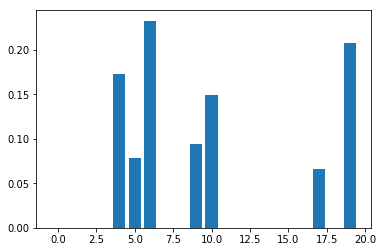

In [47]:
plt.bar(np.arange(20), dat['doc_topic_dists'][1])

#### Second Example

In [51]:
print(texts[51])

I have been following this thread on talk.religion,
soc.religion.christian.bible-study and here with interest.  I am amazed at
the different non-biblical argument those who oppose the Sabbath present. 

One question comes to mind, especially since my last one was not answered
from Scripture.  Maybe clh may wish to provide the first response.

There is a lot of talk about the Sabbath of the TC being ceremonial. 
Answer this:

Since the TC commandments is one law with ten parts on what biblical
basis have you decided that only the Sabbath portion is ceremonial?
OR You say that the seventh-day is the Sabbath but not applicable to
Gentile Christians.  Does that mean the Sabbath commandment has been
annulled?  References please.

If God did not intend His requirements on the Jews to be applicable to
Gentile Christians why did He make it plain that the Gentiles were now
grafted into the commonwealth of Israel?

Darius


In [52]:
msg = "{weight:02d}% in topic {topic_id:02d} which has top words {text:s}"
for topic_id, weight in enumerate(dat['doc_topic_dists'][51]):
    if weight > 0.01:
        text = ', '.join(topic_to_topwords[topic_id])
        print(msg.format(topic_id=topic_id, weight=int(weight * 100.0), text=text))

09% in topic 01 which has top words anonymity, >, atheism, encryption, eff, abuses, crypto, `, ripem, cryptography
51% in topic 02 which has top words jesus, god, atheism, faith, bible, christianity, truth, atheists, belief, christians
06% in topic 03 which has top words armenian, egypt, armenians, shouting, azerbaijan, his, israel, he, were, jerusalem
05% in topic 07 which has top words geb@cadre.dsl.pitt.edu, chastity, physician, intellect, n3jxp, skepticism, sugar, shameful, gordon, diet
15% in topic 13 which has top words egypt, jesus, israel, jerusalem, secular, matthew, miracles, prophecy, jews, jewish
11% in topic 16 which has top words jesus, egypt, matthew, prophecy, lord, messiah, g'd, god, christ, his


<Container object of 20 artists>

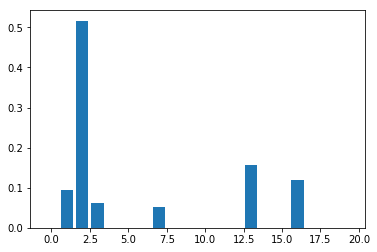

In [53]:
plt.bar(np.arange(20), dat['doc_topic_dists'][51])